In [2]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display


# Set seed for experiment reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import hashlib
import math
import os.path
import random
import re
import sys
import tarfile

import numpy as np
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf

from tensorflow.python.ops import gen_audio_ops as audio_ops
from tensorflow.python.ops import io_ops
from tensorflow.python.platform import gfile
from tensorflow.python.util import compat



In [4]:
# work, try building with bazel instead of running the Python script directly.
try:
  from tensorflow.lite.experimental.microfrontend.python.ops import audio_microfrontend_op as frontend_op  # pylint:disable=g-import-not-at-top
except ImportError:
  frontend_op = None

In [5]:
import sys
# We add this path so we can import the speech processing modules
import input_data
import models
import numpy as np

In [6]:
WANTED_WORDS = "one,two,three,four"
DATASET_DIR = './dataset'
PREPROCESS = 'micro'
WINDOW_STRIDE = 20
SAMPLE_RATE = 16000
CLIP_DURATION_MS = 1000
WINDOW_SIZE_MS = 40.0
FEATURE_BIN_COUNT = 40
BACKGROUND_FREQUENCY = 0.8
BACKGROUND_VOLUME_RANGE = 0.1
TIME_SHIFT_MS = 100.0
SILENT_PERCENTAGE =10
UNKNOWN_PERCENTAGE =25
DATA_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/speech_commands_v0.02.tar.gz'
VALIDATION_PERCENTAGE = 10
TESTING_PERCENTAGE = 10
LOGS_DIR = './logs'

In [7]:
!rm -rf ./logs

In [8]:
model_settings = models.prepare_model_settings(
    len(input_data.prepare_words_list(WANTED_WORDS.split(','))),
    SAMPLE_RATE, CLIP_DURATION_MS, WINDOW_SIZE_MS,
    WINDOW_STRIDE, FEATURE_BIN_COUNT, PREPROCESS)
audio_processor = input_data.AudioProcessor(
    DATA_URL, DATASET_DIR,
    SILENT_PERCENTAGE, UNKNOWN_PERCENTAGE,
    WANTED_WORDS.split(','), VALIDATION_PERCENTAGE,
    TESTING_PERCENTAGE, model_settings, LOGS_DIR)

In [9]:
with tf.compat.v1.Session() as sess:
    train_fingerprints, train_ground_truth = audio_processor.get_data(-1,0, model_settings,BACKGROUND_FREQUENCY, BACKGROUND_VOLUME_RANGE,
        TIME_SHIFT_MS, 'training', sess)

In [10]:
with tf.compat.v1.Session() as sess:
    val_fingerprints, val_ground_truth = audio_processor.get_data(-1,0, model_settings,BACKGROUND_FREQUENCY, BACKGROUND_VOLUME_RANGE,
        TIME_SHIFT_MS, 'validation', sess)

In [11]:
with tf.compat.v1.Session() as sess:
    test_fingerprints, test_ground_truth = audio_processor.get_data(-1,0, model_settings,BACKGROUND_FREQUENCY, BACKGROUND_VOLUME_RANGE,
        TIME_SHIFT_MS, 'testing', sess)

In [12]:
import pickle

In [13]:
with open("test_data.pkl",'wb') as file:
    pickle.dump(test_fingerprints,file)
with open("test_labels.pkl",'wb') as file1:
    pickle.dump(test_ground_truth,file1)

In [14]:
import matplotlib.pyplot as plt

In [15]:
WANTED_WORDS

'one,two,three,four'

In [16]:
labels  = ['silence','unknown']+WANTED_WORDS.split(',')

In [17]:
print(labels)

['silence', 'unknown', 'one', 'two', 'three', 'four']


In [18]:
def plots(i):
    print(labels[int(train_ground_truth[i])])
    plt.imshow(train_fingerprints[i].reshape(49,40).T)

unknown


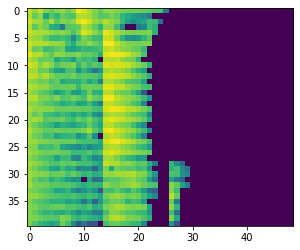

In [19]:
plots(1918)

silence


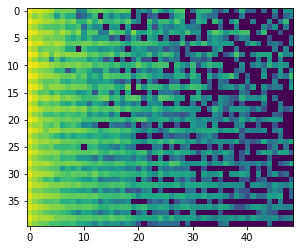

In [20]:
plots(687)

In [21]:
WANTED_WORDS

'one,two,three,four'

four


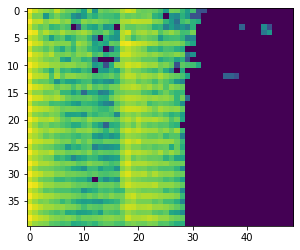

In [22]:
plots(7004)

In [23]:
train_fingerprints[0].reshape(49,40)

array([[24.53125  , 24.140625 , 25.9375   , ..., 23.2421875, 24.921875 ,
        23.90625  ],
       [25.46875  , 23.2421875, 24.6484375, ..., 22.1484375, 23.8671875,
        21.7578125],
       [24.8046875, 22.109375 , 22.6171875, ..., 20.1171875, 23.671875 ,
        21.40625  ],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ]])

In [24]:
train_ground_truth

array([1., 5., 0., ..., 5., 2., 1.])

In [25]:

from tensorflow.keras.layers.experimental import preprocessing

In [26]:
from tensorflow.keras import models as mod

In [27]:
from tensorflow.keras import layers

In [28]:
import numpy as np

In [29]:
DepthwiseConv2D(
    kernel_size, strides=(1, 1), padding='valid', depth_multiplier=1,
    data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True,
    depthwise_initializer='glorot_uniform',
    bias_initializer='zeros', depthwise_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, depthwise_constraint=None,
    bias_constraint=None, **kwargs
)

NameError: name 'DepthwiseConv2D' is not defined

In [ ]:
labels

In [30]:
model = tf.keras.Sequential()
model.add(layers.Input(shape=(1960)))
model.add(layers.Reshape((49, 40,1)))
model.add(layers.DepthwiseConv2D(kernel_size=(10,8),strides=(2,2),padding='valid',depth_multiplier=8,activation='relu')) 


model.add(layers.Dropout(0.10))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=None, padding="valid"))
#model.add(layers.Conv2D(4, kernel_size=(5,4), activation='relu')) 
#model.add(layers.MaxPool2D())
model.add(layers.Dropout(0.10))
model.add(layers.Flatten()),
model.add(layers.Dense(256, activation='relu')),
model.add(layers.Dense(len(labels), activation='softmax'))

model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 49, 40, 1)         0         
_________________________________________________________________
depthwise_conv2d (DepthwiseC (None, 20, 17, 8)         648       
_________________________________________________________________
dropout (Dropout)            (None, 20, 17, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 8, 8)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 8, 8)          0         
_________________________________________________________________
flatten (Flatten)            (None, 640)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [ ]:
EPOCHS = 100
history = model.fit(
    train_fingerprints, 
  train_ground_truth,
    validation_data=(val_fingerprints,val_ground_truth),
    epochs=EPOCHS,
)

Train on 16433 samples, validate on 1925 samples
Epoch 1/100
16416/16433 [============================>.] - ETA: 0s - loss: 1.8512 - accuracy: 0.1917WARNING:tensorflow:From /home/aml/anaconda3/envs/saad3.6/lib/python3.6/site-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
16433/16433 [==============================] - 7s 418us/sample - loss: 1.8512 - accuracy: 0.1917 - val_loss: 1.8597 - val_accuracy: 0.1823
Epoch 2/100
16433/16433 [==============================] - 7s 419us/sample - loss: 1.8475 - accuracy: 0.1942 - val_loss: 1.8566 - val_accuracy: 0.1865
Epoch 3/100
16433/16433 [==============================] - 7s 419us/sample - loss: 1.8129 - accuracy: 0.2202 - val_loss: 1.6537 - val_accuracy: 0.3787
Epoch 4/100
16433/16433 [=========

16433/16433 [==============================] - 7s 418us/sample - loss: 1.1611 - accuracy: 0.8836 - val_loss: 1.2009 - val_accuracy: 0.8416
Epoch 52/100
16433/16433 [==============================] - 7s 422us/sample - loss: 1.1611 - accuracy: 0.8835 - val_loss: 1.1987 - val_accuracy: 0.8442
Epoch 53/100
16433/16433 [==============================] - 7s 417us/sample - loss: 1.1595 - accuracy: 0.8843 - val_loss: 1.2107 - val_accuracy: 0.8312
Epoch 54/100
16433/16433 [==============================] - 7s 416us/sample - loss: 1.1591 - accuracy: 0.8853 - val_loss: 1.2022 - val_accuracy: 0.8400
Epoch 55/100
16433/16433 [==============================] - 7s 415us/sample - loss: 1.1575 - accuracy: 0.8868 - val_loss: 1.2016 - val_accuracy: 0.8379
Epoch 56/100
16433/16433 [==============================] - 7s 414us/sample - loss: 1.1550 - accuracy: 0.8896 - val_loss: 1.1962 - val_accuracy: 0.8462
Epoch 57/100
 8608/16433 [==============>...............] - ETA: 3s - loss: 1.1559 - accuracy: 0.8880

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_accuracy'])
plt.legend(['loss', 'accuracy'])
plt.show()

In [ ]:
EPOCHS = 100
history = model.fit(
    train_fingerprints, 
  train_ground_truth,
    validation_data=(val_fingerprints,val_ground_truth),
    epochs=EPOCHS,
)

In [ ]:
EPOCHS = 100
history = model.fit(
    train2, 
  labels2,
    validation_data=(valdata,vallabels),
    epochs=EPOCHS,
)

In [ ]:
model.save("my_h5_model1.h5")

In [ ]:
EPOCHS = 10
history = model.fit(
    train2, 
  labels2,
    validation_data=(valdata,vallabels),
    epochs=EPOCHS,
)

In [ ]:
test_ground_truth

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
model.save("my_h5_model_snor.h5")

In [ ]:
#df = np.expand_dims(test_fingerprints,axis=2)
y_pred = np.argmax(model.predict(test_fingerprints), axis=1)
y_true = test_ground_truth
test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
with tf.compat.v1.Session():
      print('Confusion Matrix: \n\n', tf.Tensor.eval(confusion_mtx,feed_dict=None, session=None))
    

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
train = tf.data.Dataset.from_tensor_slices((train2,labels2))

In [ ]:
test = tf.data.Dataset.from_tensor_slices((te))

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Reshape((49, 40,1), input_shape=train2.shape[1:]))
model.add(layers.Conv2D(128,3, activation='relu', input_shape=train2.shape[1:])) 
model.add(layers.Dropout(0.25))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu')) 
model.add(layers.Flatten()),
model.add(layers.Dense(128, activation='relu')),
model.add(layers.Dropout(0.5)),
model.add(layers.Dense(4, activation='softmax'))
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)
model.summary()
EPOCHS = 10
history = model.fit(
    train2, 
  labels2,
    epochs=EPOCHS,
)

In [ ]:
EPOCHS = 100
history = model.fit(
    train2, 
  labels2,validation_data=(valdata,vallabels),
    epochs=EPOCHS
)

In [ ]:
WANTED_WORDS

In [ ]:
with tf.compat.v1.Session() as sess:
    val_fingerprints, val_ground_truth = audio_processor.get_data(-1,0, model_settings,BACKGROUND_FREQUENCY, BACKGROUND_VOLUME_RANGE,
        TIME_SHIFT_MS, 'validation', sess)

In [ ]:
  with tf.compat.v1.Session() as sess:
    test_data, test_labels = audio_processor.get_data(
        -1, 0, model_settings, BACKGROUND_FREQUENCY, BACKGROUND_VOLUME_RANGE,
        TIME_SHIFT_MS, 'validation', sess)
    test_data = np.expand_dims(test_data, axis=2).astype(np.float32)

In [ ]:
train2.shape

In [ ]:
test_data.shape

In [ ]:
labels2.shape

In [ ]:
test_data[0].shape

In [ ]:
df=np.expand_dims(test_data[1],axis=0)

In [ ]:
model.predict(df)

In [ ]:
test_labels[1]

In [ ]:
np.expand_dims(test_data[1],axis=0)
y_pred = np.argmax(model.predict(test_data), axis=1)
y_true = test_labels

test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
with tf.compat.v1.Session():
   print('Confusion Matrix: \n\n', tf.Tensor.eval(confusion_mtx,feed_dict=None, session=None))

In [ ]:
model.save('kwsm.h5')

In [ ]:
with tf.Session() as sess:
  float_converter = tf.lite.TFLiteConverter.from_keras_model(model)
  float_tflite_model = float_converter.convert()
  float_tflite_model_size = open(FLOAT_MODEL_TFLITE, "wb").write(float_tflite_model)
  print("Float model is %d bytes" % float_tflite_model_size)

  converter = tf.lite.TFLiteConverter.from_saved_model(SAVED_MODEL)
  converter.optimizations = [tf.lite.Optimize.DEFAULT]
  converter.inference_input_type = tf.lite.constants.INT8
  converter.inference_output_type = tf.lite.constants.INT8
  def representative_dataset_gen():
    for i in range(100):
      data, _ = audio_processor.get_data(1, i*1, model_settings,
                                         BACKGROUND_FREQUENCY, 
                                         BACKGROUND_VOLUME_RANGE,
                                         TIME_SHIFT_MS,
                                         'testing',
                                         sess)
      flattened_data = np.array(data.flatten(), dtype=np.float32).reshape(1, 1960)
      yield [flattened_data]
  converter.representative_dataset = representative_dataset_gen
  tflite_model = converter.convert()
  tflite_model_size = open(MODEL_TFLITE, "wb").write(tflite_model)
  print("Quantized model is %d bytes" % tflite_model_size)